<a href="https://colab.research.google.com/github/CosmicAdc/AICoverGen-NO-UI-es/blob/main/SONARIA_VOL3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FEUPS Computación  🐧

### PERIODO 65

#### GENERACIÓN DE COVERS CON INTELIGENCIA ARTIFICIAL

### Guía de uso de este cuadernillo: https://docs.google.com/document/d/e/2PACX-1vSM9bLJPzN-Du8HDpkaLvgkf7X7rPymkYzddiPZ6HzPNBFaFbkwF8aN_SolxC-ZdUNJb77fz_whquqr/pub

In [1]:
#@title # **Clona e Instala**
#@markdown La instalación toma alrededor de 4 minutos

#Código para arreglar el bug con CUDA de colab
#!sudo apt update
#!yes | sudo DEBIAN_FRONTEND=noninteractive apt-get -yq install cuda-11-8
#!find / -name '*libcublasLt.so*'

#Inicio de AICoverGen
!git clone https://github.com/Eddycrack864/AICoverGen-NO-UI-es.git
%cd /content/AICoverGen-NO-UI-es
!pip install --upgrade pip==23.1
!pip install -q -r requirements.txt
!sudo apt update
!sudo apt install sox

#Nick fix
#!sudo apt install -y nvidia-cuda-toolkit

#New fix
!python -m pip install ort-nightly-gpu --index-url=https://aiinfra.pkgs.visualstudio.com/PublicPackages/_packaging/ort-cuda-12-nightly/pypi/simple/

#Descarga los modelos base de Hubert y separación vocal MDXNet
!python src/download_models.py

Cloning into 'AICoverGen-NO-UI-es'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 74 (delta 14), reused 32 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (74/74), 2.34 MiB | 3.86 MiB/s, done.
Resolving deltas: 100% (14/14), done.
/content/AICoverGen-NO-UI-es
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 59.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dep

In [2]:
#@markdown #**Descarga un modelo**
#@markdown Pega tu enlace de Drive o Hugging Face
url = "https://huggingface.co/medicreal/MedicAI/resolve/main/EminemSlimShadyRedone.zip?download=true"  # @param {type:"string"}
#@markdown Ponle un nombre a tu modelo
dir_name = "eminem"  # @param {type:"string"}

import os
import zipfile
import shutil
import urllib.request
import gdown #Provided by an AI Hispano Fork

BASE_DIR = os.getcwd()
rvc_models_dir = os.path.join(BASE_DIR, 'rvc_models')

def extract_zip(extraction_folder, zip_name):
    os.makedirs(extraction_folder, exist_ok=True)
    with zipfile.ZipFile(zip_name, 'r') as zip_ref:
        zip_ref.extractall(extraction_folder)
    os.remove(zip_name)

    index_filepath, model_filepath = None, None
    for root, dirs, files in os.walk(extraction_folder):
        for name in files:
            if name.endswith('.index') and os.stat(os.path.join(root, name)).st_size > 1024 * 100:
                index_filepath = os.path.join(root, name)

            if name.endswith('.pth') and os.stat(os.path.join(root, name)).st_size > 1024 * 1024 * 40:
                model_filepath = os.path.join(root, name)

    if not model_filepath:
        raise Exception(f'No se encontró ningún archivo .pth en el zip extraído. Por favor revisa {extraction_folder}.')

    # mueve el index y pth a la carpeta de extracción
    os.rename(model_filepath, os.path.join(extraction_folder, os.path.basename(model_filepath)))
    if index_filepath:
        os.rename(index_filepath, os.path.join(extraction_folder, os.path.basename(index_filepath)))

    # elimina las carpetas anidadas innecesarias
    for filepath in os.listdir(extraction_folder):
        if os.path.isdir(os.path.join(extraction_folder, filepath)):
            shutil.rmtree(os.path.join(extraction_folder, filepath))

def download_model(url, dir_name):
    try:
        extraction_folder = os.path.join(rvc_models_dir, dir_name)

        if not os.path.exists(extraction_folder):
            print(f'[~] Descargando el modelo con nombre {dir_name}...')

            zip_name = url.split('/')[-1]

            urllib.request.urlretrieve(url, zip_name)

            print('[~] Extrayendo zip...')
            extract_zip(extraction_folder, zip_name)
            print(f'[+] {dir_name} descargado correctamente!')
        else:
            print(f'[~] El modelo {dir_name} ya existe. Cancelando descarga...')

    except Exception as e:
        raise Exception(str(e))

def download_online_model_drive(file_id, dir_name):
    try:
        extraction_folder = os.path.join(rvc_models_dir, dir_name)

        if not os.path.exists(extraction_folder):
            print(f'[~] Descargando el modelo con nombre {dir_name}...')

            zip_name = f'{dir_name}.zip'
            gdown.download(f'https://drive.google.com/uc?id={file_id}', zip_name, quiet=False)

            print('[~] Extrayendo zip...')
            extract_zip(extraction_folder, zip_name)
            print(f'[+] {dir_name} descargado correctamente!')
        else:
            print(f'[~] El modelo {dir_name} ya existe. Cancelando descarga...')

    except Exception as e:
        raise Exception(str(e))

# Detecta si la URL es de Google Drive o Hugging Face
if 'drive.google.com' in url:
    file_id_drive = url.split('/')[-2]
    download_online_model_drive(file_id_drive, dir_name)
elif 'huggingface.co' in url:
    download_model(url, dir_name)
else:
    print('URL no reconocida. Asegúrate de proporcionar un enlace de Google Drive o Hugging Face.')

[~] Descargando el modelo con nombre eminem...
[~] Extrayendo zip...
[+] eminem descargado correctamente!


In [3]:
# @title # **Generar el cover**
# @markdown ## El audio generado está en "FIX\song_output\random_number"
# @markdown Link de YT o ruta del audio si está en Drive
SONG_INPUT = "https://www.youtube.com/watch?v=vX1lUMGURbY" # @param {type:"string"}
NOMBRE_MODELO = "eminem" # @param {type:"string"}
PITCH_CHANGE = 0 # @param {type:"integer"}
PITCH_CHANGE_ALL = 0 # @param {type:"integer"}
# @markdown Opciones de Conversión de Voz
INDEX_RATE = 0.75 # @param {type:"number"}
FILTER_RADIUS = 3 # @param {type:"integer"}
PITCH_DETECTION_ALGO = "rmvpe" # @param ["rmvpe", "mangio-crepe"]
CREPE_HOP_LENGTH = 64 # @param {type:"integer"}
PROTECT = 0.33 # @param {type:"number"}
REMIX_MIX_RATE = 0.25  # @param {type:"number"}
# @markdown Opciones de Mezcla de Audio
MAIN_VOL = 0 # @param {type:"integer"}
BACKUP_VOL = 0 # @param {type:"integer"}
INST_VOL = 0 # @param {type:"integer"}
# @markdown Control de Reverberación
REVERB_SIZE = 0.15 # @param {type:"number"}
REVERB_WETNESS = 0.2 # @param {type:"number"}
REVERB_DRYNESS = 0.8 # @param {type:"number"}
REVERB_DAMPING = 0.7 # @param {type:"number"}
# @markdown Formato de Salida
OUTPUT_FORMAT = "mp3" # @param ["mp3", "wav"]

import subprocess

command = [
    "python",
    "src/main.py",
    "-i", SONG_INPUT,
    "-dir", NOMBRE_MODELO,
    "-p", str(PITCH_CHANGE),
    "-k",
    "-ir", str(INDEX_RATE),
    "-fr", str(FILTER_RADIUS),
    "-rms", str(REMIX_MIX_RATE),
    "-palgo", PITCH_DETECTION_ALGO,
    "-hop", str(CREPE_HOP_LENGTH),
    "-pro", str(PROTECT),
    "-mv", str(MAIN_VOL),
    "-bv", str(BACKUP_VOL),
    "-iv", str(INST_VOL),
    "-pall", str(PITCH_CHANGE_ALL),
    "-rsize", str(REVERB_SIZE),
    "-rwet", str(REVERB_WETNESS),
    "-rdry", str(REVERB_DRYNESS),
    "-rdamp", str(REVERB_DAMPING),
    "-oformat", OUTPUT_FORMAT
]

# Abre un subproceso y captura su salida.
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, universal_newlines=True)

# Imprime la salida en tiempo real
for line in process.stdout:
    print(line, end='')

# Espera a que termine el proceso.
process.wait()

2024-11-29 03:57:22.711561: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-29 03:57:22.732454: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-29 03:57:22.739496: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-29 03:57:22.756090: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-29 03:57:24.523210: W tensorflow/compiler/tf2

0

Ejemplo de la ruta del audio generada

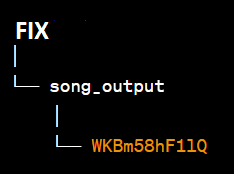